In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
pwd

'C:\\Users\\Jaimie Nguyen\\OneDrive\\Desktop'

In [20]:
ls

 Volume in drive C is OS
 Volume Serial Number is 1ED4-D029

 Directory of C:\Users\Jaimie Nguyen\OneDrive\Desktop

07/26/2021  10:09 PM    <DIR>          .
07/26/2021  10:09 PM    <DIR>          ..
07/27/2021  02:43 AM    <DIR>          Data 301
07/26/2021  10:09 PM    <DIR>          Data 301 Files
07/15/2021  10:14 AM    <DIR>          Data Project
05/25/2021  05:35 PM             2,279 Discord.lnk
11/06/2020  04:05 AM             1,261 Dropbox.lnk
06/29/2021  04:07 PM             1,218 Eclipse IDE for Java Developers - 2020-03.lnk
06/16/2021  03:10 PM    <DIR>          eclipse-workspace
07/06/2021  06:49 PM    <DIR>          First Semester 2020
06/26/2021  06:28 PM    <DIR>          Photo Wall
07/22/2021  09:10 PM         1,064,675 Quiz 2.pdf
07/21/2021  11:33 PM    <DIR>          Stats 303
05/25/2020  09:44 PM             2,243 WhatsApp.lnk
01/05/2021  08:48 PM             1,963 Zoom.lnk
               6 File(s)      1,073,639 bytes
               9 Dir(s)  123,528,462,336 bytes fr

In [92]:
cd Data Project

[WinError 2] The system cannot find the file specified: 'Data Project'
C:\Users\Jaimie Nguyen\OneDrive\Desktop\Data Project\project-group36-project\data\raw


In [93]:
ls

 Volume in drive C is OS
 Volume Serial Number is 1ED4-D029

 Directory of C:\Users\Jaimie Nguyen\OneDrive\Desktop\Data Project\project-group36-project\data\raw

07/15/2021  10:14 AM    <DIR>          .
07/15/2021  10:14 AM    <DIR>          ..
07/15/2021  10:14 AM        25,013,093 Athenslistings.csv
07/15/2021  10:14 AM                 0 README.md
               2 File(s)     25,013,093 bytes
               2 Dir(s)  122,648,182,784 bytes free


In [94]:
cd project-group36-project

[WinError 2] The system cannot find the file specified: 'project-group36-project'
C:\Users\Jaimie Nguyen\OneDrive\Desktop\Data Project\project-group36-project\data\raw


In [95]:
ls

 Volume in drive C is OS
 Volume Serial Number is 1ED4-D029

 Directory of C:\Users\Jaimie Nguyen\OneDrive\Desktop\Data Project\project-group36-project\data\raw

07/15/2021  10:14 AM    <DIR>          .
07/15/2021  10:14 AM    <DIR>          ..
07/15/2021  10:14 AM        25,013,093 Athenslistings.csv
07/15/2021  10:14 AM                 0 README.md
               2 File(s)     25,013,093 bytes
               2 Dir(s)  122,648,113,152 bytes free


In [96]:
cd data

[WinError 2] The system cannot find the file specified: 'data'
C:\Users\Jaimie Nguyen\OneDrive\Desktop\Data Project\project-group36-project\data\raw


In [97]:
cd raw

[WinError 2] The system cannot find the file specified: 'raw'
C:\Users\Jaimie Nguyen\OneDrive\Desktop\Data Project\project-group36-project\data\raw


In [98]:
df=pd.read_csv("Athenslistings.csv")

In [99]:
list(df.columns)

['id',
 'listing_url',
 'scrape_id',
 'last_scraped',
 'name',
 'description',
 'neighborhood_overview',
 'picture_url',
 'host_id',
 'host_url',
 'host_name',
 'host_since',
 'host_location',
 'host_about',
 'host_response_time',
 'host_response_rate',
 'host_acceptance_rate',
 'host_is_superhost',
 'host_thumbnail_url',
 'host_picture_url',
 'host_neighbourhood',
 'host_listings_count',
 'host_total_listings_count',
 'host_verifications',
 'host_has_profile_pic',
 'host_identity_verified',
 'neighbourhood',
 'neighbourhood_cleansed',
 'neighbourhood_group_cleansed',
 'latitude',
 'longitude',
 'property_type',
 'room_type',
 'accommodates',
 'bathrooms',
 'bathrooms_text',
 'bedrooms',
 'beds',
 'amenities',
 'price',
 'minimum_nights',
 'maximum_nights',
 'minimum_minimum_nights',
 'maximum_minimum_nights',
 'minimum_maximum_nights',
 'maximum_maximum_nights',
 'minimum_nights_avg_ntm',
 'maximum_nights_avg_ntm',
 'calendar_updated',
 'has_availability',
 'availability_30',
 'availa

In [100]:
df=df[[ 'property_type', 'accommodates', 'price']]
df=df.dropna().reset_index(drop=True)
df

,property_type,accommodates,price
0,Entire apartment,8,$74.00
1,Entire apartment,4,$50.00
2,Entire apartment,2,$40.00
3,Entire apartment,4,$50.00
4,Entire apartment,4,$50.00
...,...,...,...
9505,Entire apartment,2,$50.00
9506,Entire apartment,4,$40.00
9507,Entire apartment,6,$392.00
9508,Entire condominium,6,$34.00


In [101]:
Apdf=df[df['property_type'] =='Entire apartment'].reset_index(drop=True)
Apdf

,property_type,accommodates,price
0,Entire apartment,8,$74.00
1,Entire apartment,4,$50.00
2,Entire apartment,2,$40.00
3,Entire apartment,4,$50.00
4,Entire apartment,4,$50.00
...,...,...,...
7342,Entire apartment,4,$30.00
7343,Entire apartment,2,$50.00
7344,Entire apartment,4,$40.00
7345,Entire apartment,6,$392.00


In [102]:
condf=df[df['property_type'] =='Entire condominium'].reset_index(drop=True)
condf

,property_type,accommodates,price
0,Entire condominium,12,$298.00
1,Entire condominium,8,$189.00
2,Entire condominium,2,$44.00
3,Entire condominium,5,$80.00
4,Entire condominium,12,$294.00
...,...,...,...
284,Entire condominium,5,$20.00
285,Entire condominium,2,$35.00
286,Entire condominium,2,$104.00
287,Entire condominium,4,$19.00


In [103]:
prapdf=df[df['property_type'] =='Private room in apartment'].reset_index(drop=True)
prcondf=df[df['property_type'] =='Private room in condominium'].reset_index(drop=True)
private=prapdf.merge(prcondf,"outer")
private

,property_type,accommodates,price
0,Private room in apartment,1,$39.00
1,Private room in apartment,2,$30.00
2,Private room in apartment,2,$30.00
3,Private room in apartment,2,$30.00
4,Private room in apartment,2,$30.00
...,...,...,...
612,Private room in condominium,1,$10.00
613,Private room in condominium,1,$10.00
614,Private room in condominium,1,$10.00
615,Private room in condominium,1,$12.00


In [129]:
df1=df[df['property_type'] !='Entire apartment'].reset_index(drop=True)
df1=df1[df1['property_type'] !='Private room in apartment'].reset_index(drop=True)
df1=df1[df1['property_type'] !='Private room in condominium'].reset_index(drop=True)
df1=df1[df1['property_type'] !='Entire condominium'].reset_index(drop=True)
df2=df1[df1['accommodates'] < 7]
df2


,property_type,accommodates,price
0,Entire loft,4,$58.00
1,Entire house,4,$45.00
2,Entire loft,3,$32.00
3,Entire cottage,4,$80.00
4,Entire bed and breakfast,3,$120.00
...,...,...,...
1250,Private room in loft,1,$99.00
1251,Entire loft,2,$200.00
1253,Room in hotel,2,$60.00
1254,Room in hotel,3,$253.00


Text(0.5, 1.0, 'Miscillaneous Property Rentals')

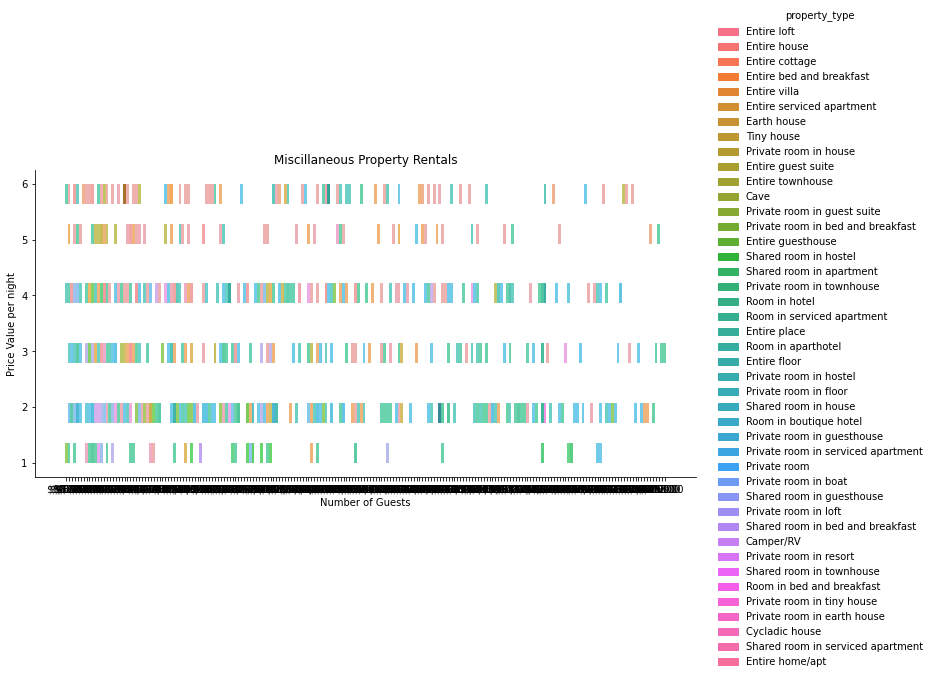

In [144]:
ax = sns.displot(df2,
            x='price',
            y='accommodates',
            hue ='property_type',
            aspect=2,
           )

plt.xlabel('Number of Guests')
plt.ylabel('Price Value per night')
plt.title('Miscillaneous Property Rentals')

In [130]:
large = df1[df1['accommodates'] >= 7]
large

,property_type,accommodates,price
25,Private room in boat,8,$260.00
62,Entire house,8,$120.00
63,Entire house,7,$80.00
94,Entire house,11,$340.00
108,Entire villa,8,$216.00
...,...,...,...
1167,Shared room in apartment,11,$9.00
1216,Entire serviced apartment,7,$65.00
1248,Private room in house,8,$40.00
1252,Entire villa,10,$699.00
